# Synthetic data generation
Run this notebook to generate a synthetic dataset of lowercase and/or uppercase letters of different fonts and sizes for training and testing.

Parameters can be easily modified to change the font, the size, the thickness, or the colour; and to increase/reduce the randomness of the dataset.

In [61]:
import random
import string
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from pathlib import Path

In [62]:
# Generate image from letter
def get_letter_image(letter: str, image_size: int=128) -> np.ndarray:
    """Generates a grayscale letter image.

    Returns:
        np.ndarray: letter image.
    """

    image = np.zeros((image_size, image_size), dtype=np.uint8)    
    
    # Text parameters
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_size = random.randint(1, 4)
    font_thickness = random.randint(1, 4)
    font_colour = (255)
    letter_width, letter_height = cv2.getTextSize(letter, font, font_size, font_thickness)[0]
    x = random.randint(0, image_size - letter_width)
    y = random.randint(0, image_size - letter_height)
    
    # Text origin is at the bottom left corner
    cv2.putText(image, letter, (x, image_size - y), font, font_size, font_colour, font_thickness)
    
    return image

# Choose uppercase, lowercase, or all letters
def get_letter_case(letter_case: str) -> str:
    match letter_case:
        case "upper":
            return string.ascii_uppercase
        case "lower":
            return string.ascii_lowercase
        case "all":
            return string.ascii_letters
        case _:
            raise ValueError("Invalid letter case")

# Generate letter dataset
def generate_letter_dataset(output_dir: Path=Path('letters_dataset'), images_per_class: int=100, image_size: int=128, letter_case: str="upper") -> None:
    output_dir.mkdir(exist_ok=True, parents=True)  # create dataset directory
    
    # Generate n=images_per_class images for each letter
    for letter in get_letter_case(letter_case):        
        for i in range(images_per_class):
            image = get_letter_image(letter, image_size=image_size)
            filename = output_dir / f"{letter}_{i:04}.png"
            cv2.imwrite(filename, image)
        
        print(f"Generated {images_per_class} images for letter {letter}")

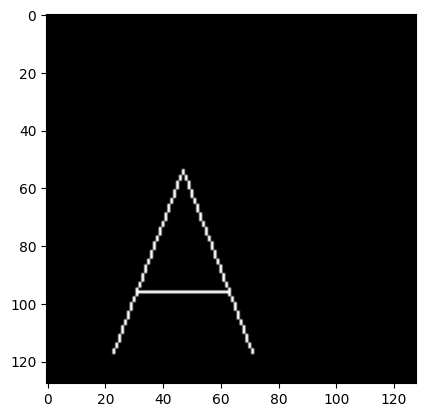

In [63]:
image = get_letter_image("A")
plt.imshow(image, cmap='gray')

In [ ]:

# Generate training and testing datasets
output_dir = Path("/home/ubuntu/data/letters_dataset/train")
generate_letter_dataset(output_dir, images_per_class=10)

output_dir = Path("/home/ubuntu/data/letters_dataset/test")
generate_letter_dataset(output_dir, images_per_class=2)

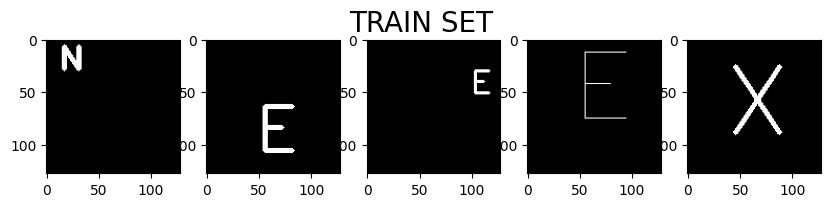

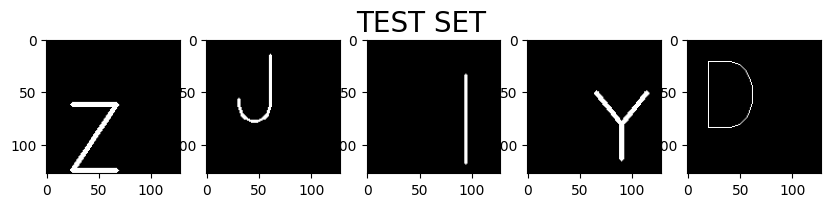

In [65]:
def display_images(output_dir: Path, n_samples: int) -> None:
    img_dirs = list(output_dir.glob("*"))
    img_dirs = random.sample(img_dirs, n_samples)

    images = []
    for img in img_dirs:
        images.append(mpimg.imread(img))

    data_set = output_dir.stem.upper()
    plt.figure(figsize=(10,2))
    plt.suptitle(f'{data_set} SET', fontsize =20)
    rows = 1
    columns = n_samples
    for i, image in enumerate(images):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(image, cmap='gray')

train_data = Path("/home/ubuntu/data/letters_dataset/train")
test_data = Path("/home/ubuntu/data/letters_dataset/test")
n_samples = 5

display_images(train_data, n_samples)
display_images(test_data, n_samples)